# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score , confusion_matrix,classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Loading Dataset
### Steps Performed:-
* Load CSV file
* Display first few rows
* Check dataset shape

In [2]:
pd.set_option('display.max_columns',None)

In [3]:
df=pd.read_csv('marketing_customer_data_uncleaned - Copy.csv')

In [4]:
df.head()

,Unnamed: 0,Marketing dataset: \nContaining customer base data and if the campaign was successful or not.,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ID,Year_Birth,Education,Marital_Status,NaN,Income,Kidhome,Teenhome,Dt_Customer,Country,Complain,Successful Campaigns
2,1826,1970,Graduation,Divorced,NaN,"$84,835.00",0 kid(s),0,6/16/2014,SP,0,1
3,1,1961,Graduation,Single,NaN,"$57,091.00",0 kid(s),0,6/15/2014,CA,0,1
4,1,1961,Graduation,Single,NaN,"$57,091.00",0 kid(s),0,6/15/2014,CA,0,1


In [5]:
# Shape of Data
df.shape

(2247, 12)

# Understanding Dataset
### Steps Performed:-
* Column names
* Data types
* Missing values
* Duplicate records

In [6]:
# Columns Name
df.columns

Index(['Unnamed: 0',
       'Marketing dataset: \nContaining customer base data and if the campaign was successful or not.',
       'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6',
       'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10', 'Unnamed: 11'],
      dtype='object')

In [7]:
# Missing Value
df.isnull().sum()

Unnamed: 0                                                                                          4
Marketing dataset: \nContaining customer base data and if the campaign was successful or not.       4
Unnamed: 2                                                                                          4
Unnamed: 3                                                                                          4
Unnamed: 4                                                                                       2247
Unnamed: 5                                                                                         28
Unnamed: 6                                                                                          4
Unnamed: 7                                                                                          4
Unnamed: 8                                                                                          4
Unnamed: 9                                                                        

In [8]:
# Duplicate Value
df.duplicated().sum()

5

# Data Cleaning
### Steps Performed:-
* Fix incorrect headers
* Remove extra spaces in column names
* Remove duplicate rows
* Drop unnecessary columns (like ID)
* Handle missing values
* Standardize currency values
* Clean categorical text values

In [9]:
# Takes 2nd rows as a header
df.columns = df.iloc[1]
# remove duplicate row of that header
df = df.iloc[2:]
# reset index
df.reset_index(drop=True, inplace=True)

In [10]:
# Remove extra space in header
df.columns = df.columns.str.strip()


In [11]:
# remove whole blank row
df=df.dropna(how='all')
# remove whole blank columns
df=df.dropna(axis=1,how='all')
# reset index
df.reset_index(drop=True, inplace=True)


In [12]:
# Drop duplicates
df.drop_duplicates(inplace=True)

In [13]:
# drop unnecessary columns
df=df.drop('ID',axis=1)

In [14]:
# Our dataset date have different format to fix this :
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], dayfirst=False, format='mixed')
df['Dt_Customer'] = df['Dt_Customer'].dt.strftime('%d-%b-%Y')

In [15]:
# Replaces 'USD' with an empty string 
# Removes both dollar signs and commas, then converts to float
df['Income'] = (df['Income']
                .str.replace('$', '', regex=False)
                .str.replace(',', '', regex=False)
                .str.strip()
                .astype(float))


In [16]:
# drop null values
df.dropna(inplace=True)

In [17]:
# Removes kid(s) from columns
df['Kidhome'] = df['Kidhome'].str.replace(r'\D', '', regex=True)

# Exploratory Data Analysis (EDA)
### Analysis Performed
* Category distribution (Education, Country, Marital Status)
* Data visualization using plots and heatmaps

In [18]:
df['Marital_Status'].value_counts()

Marital_Status
Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
YOLO          2
Absurd        2
Name: count, dtype: int64

In [19]:
df['Education'].value_counts()

Education
Graduation         1116
PhD                 481
Master              365
Bachelor degree     200
Undergraduate        54
Name: count, dtype: int64

In [20]:
df['Country'].value_counts()

Country
SP     1093
SA      337
CA      266
AUS     147
IND     147
GER     116
US      107
ME        3
Name: count, dtype: int64

In [21]:
# Converted Categorical to Int
cols_to_fix = ['Year_Birth', 'Kidhome','Teenhome','Complain','Successful Campaigns']
df[cols_to_fix] = df[cols_to_fix].apply(pd.to_numeric, errors='coerce')

# convert object to date
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])

# Encoding Catogorical Variables
#### Lable Encoding
* Used where category orders matters(Eg:- Education)

#### One Hot Encoding
* Used for Nominal Category(Eg:- Country)

In [22]:
# label encoding
df['Education']=df['Education'].map({
    'Undergraduate':0,
    'Bachelor degree':1,
    'Graduation':2,
    'Master':3,
    'PhD':4
})

df['Marital_Status'] = df['Marital_Status'].replace({
    'Together': 'Partnered',
    'Married': 'Partnered',
    'Alone': 'Single', 'YOLO': 'Single', 'Absurd': 'Single','Divorced':'Single', 'Widow':'Single'
})

# Map marital_status
df['Marital_Status']=df['Marital_Status'].map({'Single':0,'Partnered':1})

In [23]:
# one hot encoding
df=pd.get_dummies(df,columns=['Country'],drop_first=True,dtype='int')

# Feature Engineering
* New Features are created to improve model performance
### Features Created
* Total Dependents (Kid + Teen count)
* Parent Indicator (Is Parent or Not)
* Customer Age
* Disposable Income Proxy
* Irrelevant columns removed after feature creation.

In [24]:
# Total Dependant (combine teenhome + kidhome to see full household size)
df['Total_Dependents']=df['Kidhome']+df['Teenhome']

In [25]:
# is_parent
df['Is_parent'] = (df['Total_Dependents'] >= 1).astype(int)

In [26]:
# get age of customer using last occuring date in dt_customer
df['Age']=2015-df['Year_Birth']

In [27]:
# Create a 'Disposable Income' proxy
df['Income_per_Capita'] = df['Income'] / (df['Kidhome'] + df['Teenhome'] + 1)

In [28]:
# drop Irrelevant columns
df.drop(columns=['Year_Birth','Dt_Customer'],axis=1,inplace=True)

# Spliting Dataset
### Dataset is split into:
* Features (X)
* Target Variable (Successful Campaigns)

### Then split into:
* Training Data
* Testing Data

In [29]:
# spliting into feature and target variable
X= df.drop('Successful Campaigns',axis=1)
y=df['Successful Campaigns']

In [30]:
# spliting into training and testing data
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

# Model Building
### A Machine Learning Pipeline is used to :-
* Scale features
* Train Logistic Regression model
* Avoid data leakage

In [31]:
# Using Pipeline to avoid Data Leakge
pipeline=Pipeline([
    ('scaler',StandardScaler()),
    ('model',LogisticRegression(class_weight='balanced'))
])

# Model Evaluation
### Model Performance is evaluated using:
* Classification Report
* Confusion Matrix
* Probability Threshold Optimization

Custom threshold tuning is done to improve marketing ROI

In [32]:
# Fit the data
pipeline.fit(X_train,y_train)

# predict 
prediction=pipeline.predict(X_test)

# Accuracy 
accuracy=accuracy_score(y_test,prediction)*100

print(f"Accuracy Score {accuracy:.2f}")

Accuracy Score 69.82


In [33]:
clasfication = classification_report(y_test,prediction)
print(clasfication)

              precision    recall  f1-score   support

           0       0.93      0.70      0.80       379
           1       0.29      0.71      0.41        65

    accuracy                           0.70       444
   macro avg       0.61      0.70      0.60       444
weighted avg       0.84      0.70      0.74       444



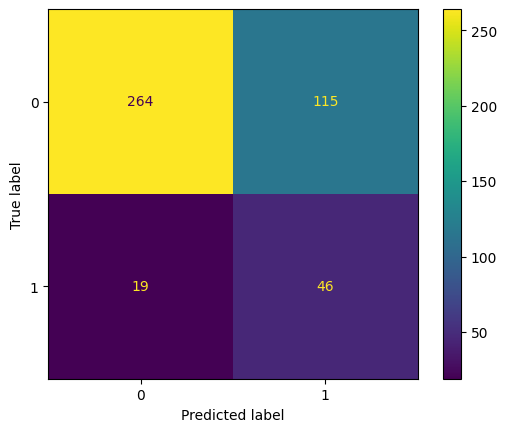

In [34]:


cm = confusion_matrix(y_test, prediction)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [35]:
probs = pipeline.predict_proba(X_test)[:, 1]

# 2. Apply a stricter threshold (0.8 instead of 0.5)
high_confidence_preds = (probs > 0.80).astype(int)

# 3. Check the new report
print("Report with 80% Threshold:")
print(classification_report(y_test, high_confidence_preds))

Report with 80% Threshold:
              precision    recall  f1-score   support

           0       0.87      0.99      0.92       379
           1       0.62      0.12      0.21        65

    accuracy                           0.86       444
   macro avg       0.74      0.55      0.56       444
weighted avg       0.83      0.86      0.82       444



In [36]:
# Try 0.65 - usually the 'sweet spot' for marketing ROI
balanced_preds = (probs > 0.65).astype(int)
print("Report with 65% Threshold:")
print(classification_report(y_test, balanced_preds))

Report with 65% Threshold:
              precision    recall  f1-score   support

           0       0.91      0.88      0.89       379
           1       0.40      0.46      0.43        65

    accuracy                           0.82       444
   macro avg       0.65      0.67      0.66       444
weighted avg       0.83      0.82      0.83       444



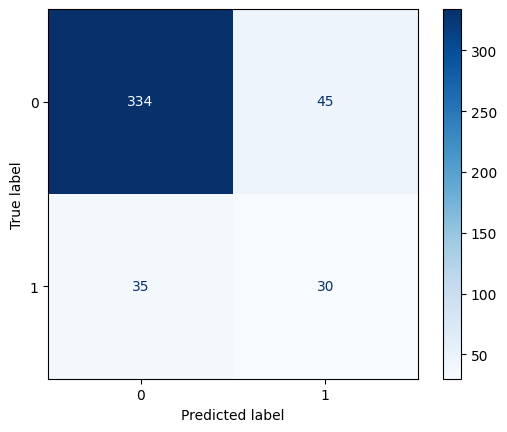

In [37]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Using your balanced 65% threshold
cm = confusion_matrix(y_test, (probs > 0.65).astype(int))
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')

# Business Output
### Final model is used to:
* Predict high probability customers
* Generate target marketing list
* Export results to CSV

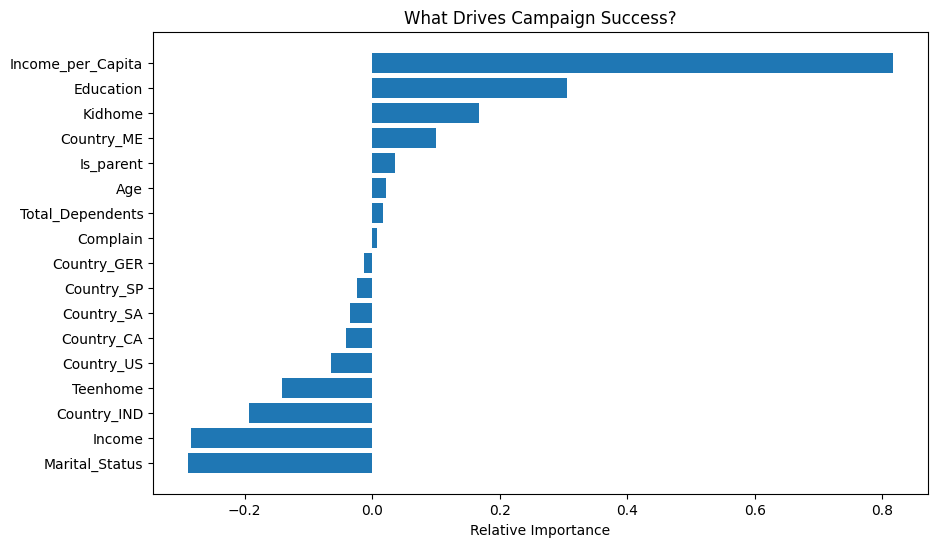

In [38]:
# Pull the model and the feature names from the pipeline
model = pipeline.named_steps['model']
# If you used a scaler, you'll need the column names from your original X
feature_names = X.columns 

# For Logistic Regression:
importances = model.coef_[0]

# Sort them for a better plot
indices = np.argsort(importances)

plt.figure(figsize=(10, 6))
plt.title("What Drives Campaign Success?")
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [39]:
# Create a copy of our test data
results = X_test.copy()

# Add the actual outcome and the predicted probability
results['Actual_Success'] = y_test
results['Success_Probability'] = probs

# Filter for your 'Balanced' target group (Threshold 0.65)
target_list = results[results['Success_Probability'] > 0.65].sort_values(by='Success_Probability', ascending=False)

# Export to CSV
target_list.to_csv('campaign_target_list.csv', index=False)
print(f"Target list created with {len(target_list)} high-potential leads.")

Target list created with 75 high-potential leads.
